In [1]:
#import the package
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model 

#Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, make_scorer


# Importing classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn import linear_model 
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier

# Importing required packages for visualization
from IPython.display import Image  
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

#- import class imbalanced packages
from imblearn import over_sampling 
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.multiclass import OneVsRestClassifier

# Importing XGBoost library
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
dfTrace = pd.read_csv('/Users/rparama/Downloads/Dataset/EtherClusterV2.csv')
dfTrace.head()

,token_name,receipt_status,Contract_is_erc20,trace_from_address,trace_to_address,trace_value,trace_gas,trace_gas_used,token_transfer_from_address,token_transfer_to_address,...,transaction_value,transaction_gas,transaction_gas_price,receipt_cumulative_gas_used,receipt_gas_used,token_decimals,token_total_supply,Contract_address,KClusterID,HCluster_id
0,Gastoken.io,0,0,4,4,0.0,127266471.0,125815805.0,2,1,...,0.0,256089852,69400000000,7567350,252218296,2.0,12923228.0,2,1,0.0
1,Gastoken.io,0,0,4,4,0.0,127266471.0,125815805.0,2,1,...,0.0,256089852,69400000000,7567350,252218296,2.0,12923228.0,2,1,0.0
2,Gastoken.io,0,0,4,4,0.0,127266471.0,125815805.0,2,1,...,0.0,256089852,69400000000,7567350,252218296,2.0,12923228.0,2,1,0.0
3,Gastoken.io,1,0,4,2,0.0,4419811.0,1113697.0,3,3,...,0.0,5901184,12008000000,543034,3107288,2.0,12923228.0,1,1,0.0
4,Gastoken.io,1,0,4,2,0.0,4419811.0,1113697.0,3,3,...,0.0,5901184,12008000000,543034,3107288,2.0,12923228.0,1,1,0.0


In [3]:
dfTrace.columns

Index(['token_name', 'receipt_status', 'Contract_is_erc20',
       'trace_from_address', 'trace_to_address', 'trace_value', 'trace_gas',
       'trace_gas_used', 'token_transfer_from_address',
       'token_transfer_to_address', 'token_transfer_value',
       'transaction_from_address', 'transaction_to_address',
       'transaction_value', 'transaction_gas', 'transaction_gas_price',
       'receipt_cumulative_gas_used', 'receipt_gas_used', 'token_decimals',
       'token_total_supply', 'Contract_address', 'KClusterID', 'HCluster_id'],
      dtype='object')

# Splitting the data into train & test data

In [4]:
# Putting feature variable to X
X= dfTrace[['receipt_status', 
            'Contract_is_erc20',
            'trace_from_address', 
            'trace_to_address', 
            'trace_value', 
            'trace_gas',
            'trace_gas_used', 
            'token_transfer_from_address',
            'token_transfer_to_address', 
            'token_transfer_value',
            'transaction_from_address', 
            'transaction_to_address',
            'transaction_value', 
            'transaction_gas', 
            'transaction_gas_price',
            'receipt_cumulative_gas_used', 
            'receipt_gas_used', 
            'token_decimals',
            'token_total_supply', 
            'Contract_address']]

# Putting response variable to y
y= dfTrace['KClusterID']#class variable

In [5]:
# Putting feature variable to X
feature_cols= dfTrace[['receipt_status', 
            'Contract_is_erc20',
            'trace_from_address', 
            'trace_to_address', 
            'trace_value', 
            'trace_gas',
            'trace_gas_used', 
            'token_transfer_from_address',
            'token_transfer_to_address', 
            'token_transfer_value',
            'transaction_from_address', 
            'transaction_to_address',
            'transaction_value', 
            'transaction_gas', 
            'transaction_gas_price',
            'receipt_cumulative_gas_used', 
            'receipt_gas_used', 
            'token_decimals',
            'token_total_supply', 
            'Contract_address']]

In [6]:
# generate 4 class dataset
X, y = make_classification(n_samples=1000, n_classes=4, n_features=20, n_informative=3, random_state=42)


In [7]:
def precision(y_true, y_pred):
    i = set(y_true).intersection(y_pred)
    len1 = len(y_pred)
    if len1 == 0:
        return 0
    else:
        return len(i) / len1

In [8]:
def recall(y_true, y_pred):
    i = set(y_true).intersection(y_pred)
    return len(i) / len(y_true)

In [9]:
def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    if p + r == 0:
        return 0
    else:
        return 2 * (p * r) / (p + r)

In [10]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [11]:
#Code used to split the data set into data set Train and data set test of 80-20
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))
print("\n")
print("X train Shape ({0},{1})".format(X_train.shape[0], X_train.shape[1]))
print("y train Shape ({0},1)".format(y_train.shape[0]))
print("\n")
print("X test Shape ({0},{1})".format(X_test.shape[0], X_test.shape[1]))
print("y test Shape ({0},1)".format(y_test.shape[0]))

Number transactions train dataset:  800
Number transactions test dataset:  200
Total number of transactions:  1000


X train Shape (800,20)
y train Shape (800,1)


X test Shape (200,20)
y test Shape (200,1)


### Preserve X_test & y_test to evaluate on the test data once model is build

In [12]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

1505
1214
291


# Model Building - Imbalanced Dataset
- Build different models on the imbalanced dataset and see the result

# Decision Tree

In [13]:
# Importing decision tree classifier from sklearn library

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    stratify=y, 
                                                    random_state = 99)

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=5)

In [14]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics


# Making predictions
y_pred_default = dt_default.predict(X_test)
y_pred_prob = dt_default.predict_proba(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89        49
           1       0.90      0.88      0.89        51
           2       0.85      0.82      0.84        50
           3       0.82      0.82      0.82        50

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



In [17]:
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred_default)
precision=sklearn.metrics.precision_score(y_test, y_pred_default,average='macro')
recall=sklearn.metrics.recall_score(y_test, y_pred_default,average='macro')

print("Accuracy: %.2f%% " % (accuracy * 100.0))
print("Precision: %.2f%% " % (precision *100))
print("Recall: %.2f%% " % (recall * 100))


Accuracy: 86.00% 
Precision: 85.99% 
Recall: 86.02% 


In [18]:
#### Print the FPR,TPR & select the best threshold from the roc curve

# # Let's take a look at the confusion matrix again 
print("confusion matrix:")
confusion = confusion_matrix(y_test,y_pred_default)
print(confusion)
print('\n')

# Let's check the overall accuracy.
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred_default)
print("Accuracy    : %.2f%% " % (accuracy * 100.0))


TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity 
sensitivity = TP / float(TP+FN)
print("Sensitivity : %.2f%% " % (sensitivity * 100.0))

# Let us calculate specificity
specificity = TN / float(TN+FP)
print("Specificity : %.2f%% " % (specificity * 100.0))
print('\n')

# Calculate True postive rate 
print("True Postive Rate : %.2f%% " % (sensitivity * 100.0))


# Calculate false postive rate - predicting Fraud when customer does not have non-Fraud
FPR = FP/ float(TN+FP)
print("False Postive Rate : %.2f%% " % (FPR * 100.0))

# positive predictive value 
PPV = TP / float(TP+FP)
print("Positive Predictive Value : %.2f%% " % (PPV * 100.0))

# Negative predictive value
NPV = TN / float(TN+ FN)
print("Negative Predictive Value : %.2f%% " % (NPV * 100.0))

confusion matrix:
[[45  0  4  0]
 [ 2 45  1  3]
 [ 3  0 41  6]
 [ 2  5  2 41]]


Accuracy    : 86.00% 
Sensitivity : 95.74% 
Specificity : 100.00% 


True Postive Rate : 95.74% 
False Postive Rate : 0.00% 
Positive Predictive Value : 100.00% 
Negative Predictive Value : 95.74% 


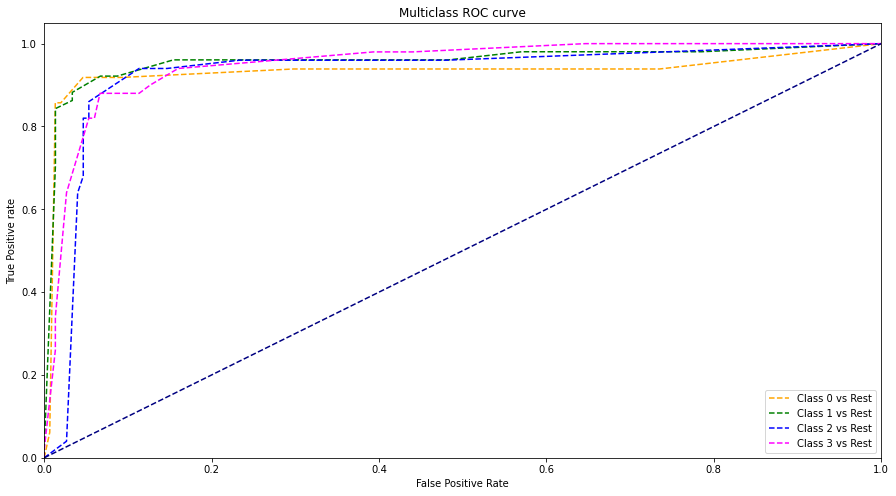

In [19]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_prob[:,i], pos_label=i)

# plotting   
plt.subplots(figsize=(15,8))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='magenta', label='Class 3 vs Rest')
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)

In [20]:
# Putting features
features = list(dfTrace.columns[1:21])
features

['receipt_status',
 'Contract_is_erc20',
 'trace_from_address',
 'trace_to_address',
 'trace_value',
 'trace_gas',
 'trace_gas_used',
 'token_transfer_from_address',
 'token_transfer_to_address',
 'token_transfer_value',
 'transaction_from_address',
 'transaction_to_address',
 'transaction_value',
 'transaction_gas',
 'transaction_gas_price',
 'receipt_cumulative_gas_used',
 'receipt_gas_used',
 'token_decimals',
 'token_total_supply',
 'Contract_address']

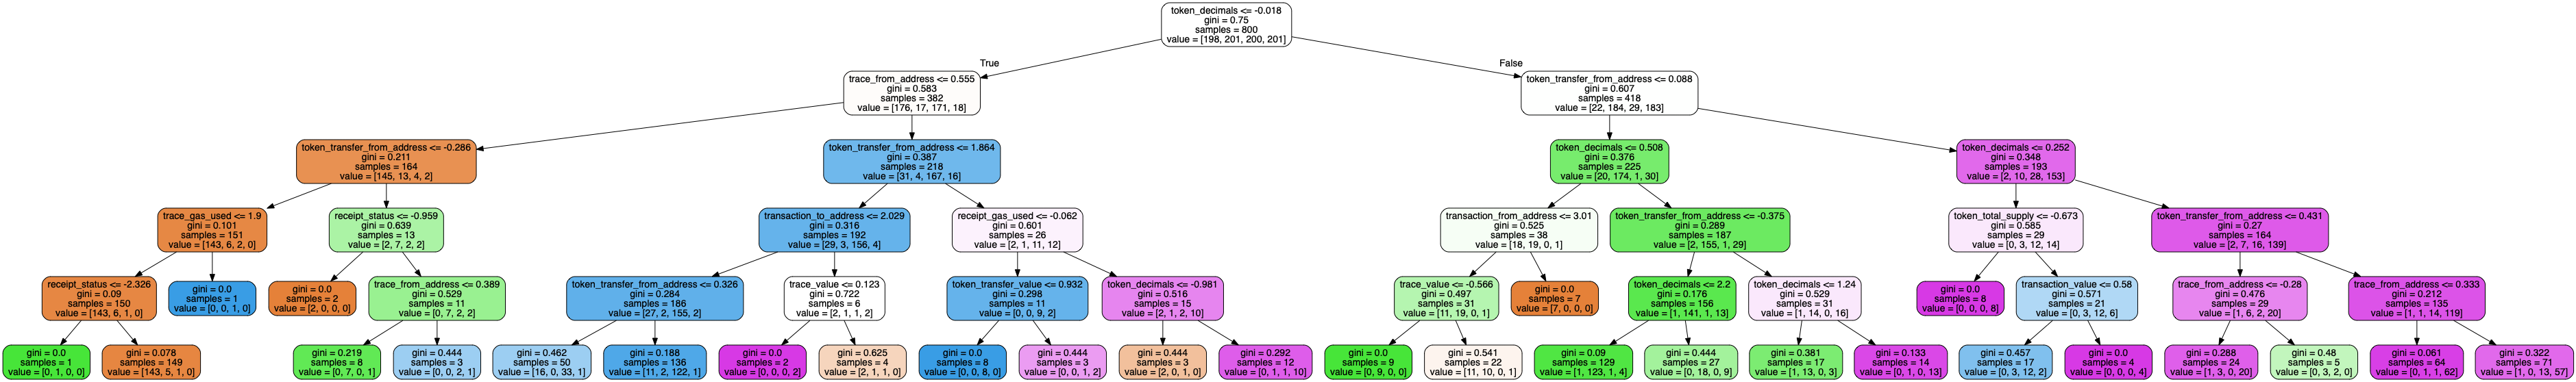

In [21]:
# plotting tree with max_depth=5
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [22]:
# Tuning max_depth
# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# parameters to build the model on
parameters = {'max_depth': range(1, 10)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", random_state = None)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, cv=n_folds, scoring="accuracy", return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10)}, return_train_score=True,
             scoring='accuracy')

In [23]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001923,0.000216,0.000372,0.000157,1,{'max_depth': 1},0.42500,0.43125,0.42500,0.45000,...,0.43500,0.010155,9,0.456250,0.453125,0.454688,0.453125,0.451562,0.453750,0.001593
1,0.003007,0.000101,0.000306,0.000038,2,{'max_depth': 2},0.76875,0.75625,0.80000,0.79375,...,0.77375,0.019922,5,0.806250,0.800000,0.798438,0.785937,0.804688,0.799063,0.007167
2,0.004180,0.000116,0.000314,0.000019,3,{'max_depth': 3},0.75000,0.76875,0.80625,0.81875,...,0.78000,0.027500,4,0.820312,0.810937,0.804688,0.809375,0.818750,0.812812,0.005880
3,0.005213,0.000054,0.000357,0.000056,4,{'max_depth': 4},0.75000,0.77500,0.78750,0.81875,...,0.78250,0.022150,3,0.853125,0.839063,0.848437,0.848437,0.846875,0.847188,0.004571
4,0.006317,0.000052,0.000424,0.000093,5,{'max_depth': 5},0.76875,0.76250,0.79375,0.85625,...,0.79000,0.034821,2,0.895312,0.878125,0.885938,0.884375,0.898438,0.888437,0.007435


<Figure size 432x288 with 0 Axes>

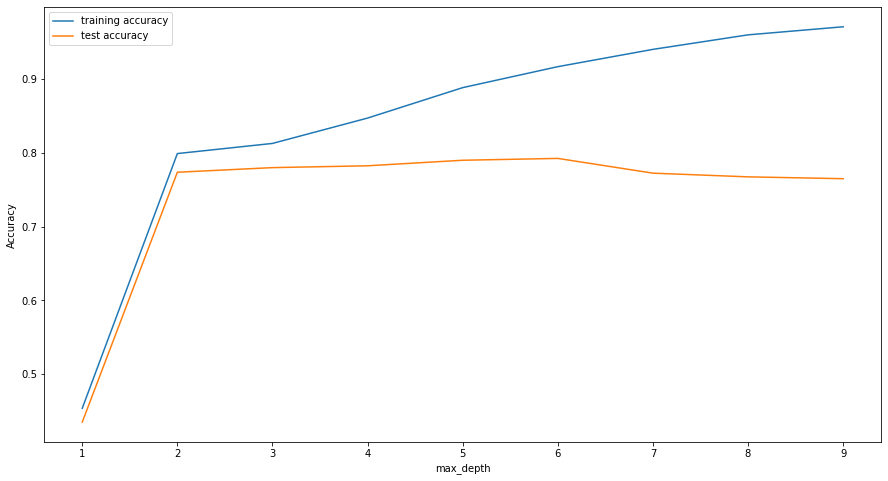

In [24]:
# plotting accuracies with max_depth
plt.figure()
plt.subplots(figsize=(15,8))
plt.plot(scores["param_max_depth"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_max_depth"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [25]:
# Tuning min_samples_leaf
# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# parameters to build the model on
parameters = {'min_samples_leaf': range(0, 25)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, cv=n_folds, scoring="accuracy", return_train_score=True)

tree.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(0, 25)},
             return_train_score=True, scoring='accuracy')

In [26]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000694,0.000119,0.000000,0.000000,0,{'min_samples_leaf': 0},NaN,NaN,NaN,NaN,...,NaN,NaN,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.010799,0.000475,0.000399,0.000012,1,{'min_samples_leaf': 1},0.72500,0.73750,0.70625,0.77500,...,0.73500,0.022569,23,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.009667,0.000220,0.000390,0.000029,2,{'min_samples_leaf': 2},0.73125,0.76875,0.71250,0.75625,...,0.73500,0.024238,23,0.957812,0.959375,0.957812,0.951562,0.948438,0.955000,0.004239
3,0.009051,0.000335,0.000402,0.000015,3,{'min_samples_leaf': 3},0.78125,0.72500,0.73125,0.80625,...,0.75625,0.031869,22,0.928125,0.934375,0.935937,0.934375,0.925000,0.931562,0.004239
4,0.008866,0.000282,0.000482,0.000071,4,{'min_samples_leaf': 4},0.75000,0.76875,0.76875,0.82500,...,0.77125,0.028668,18,0.898438,0.909375,0.914062,0.910937,0.901563,0.906875,0.005896


<Figure size 432x288 with 0 Axes>

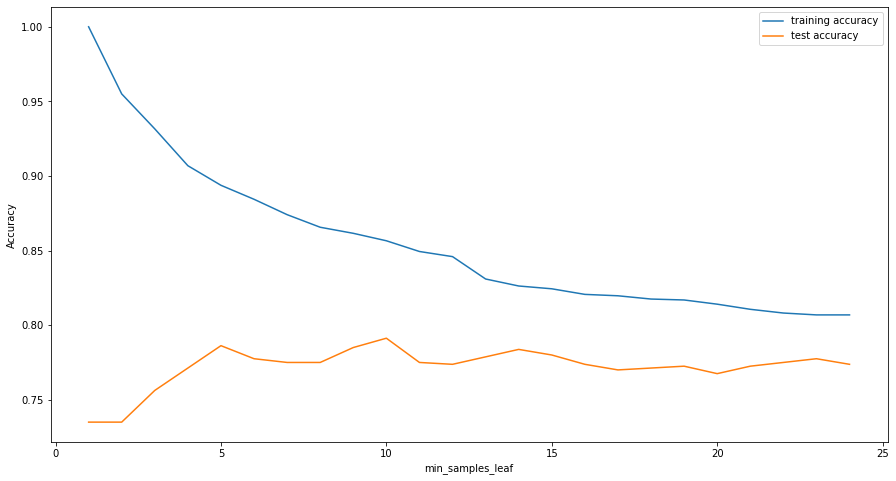

In [27]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.subplots(figsize=(15,8))
plt.plot(scores["param_min_samples_leaf"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [28]:
# Tuning min_samples_split
# GridSearchCV to find optimal min_samples_split

# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# parameters to build the model on
parameters = {'min_samples_split': range(1, 50)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, cv=n_folds, scoring="accuracy",return_train_score=True)

tree.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(1, 50)},
             return_train_score=True, scoring='accuracy')

In [29]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000687,0.000127,0.000000,0.000000,1,{'min_samples_split': 1},NaN,NaN,NaN,NaN,...,NaN,NaN,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.010898,0.000568,0.000397,0.000027,2,{'min_samples_split': 2},0.7250,0.73750,0.70625,0.7750,...,0.73500,0.022569,45,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000
2,0.011047,0.000418,0.000443,0.000047,3,{'min_samples_split': 3},0.7125,0.74375,0.68125,0.7750,...,0.72750,0.031275,48,0.989062,0.995313,0.987500,0.98750,0.989062,0.989687,0.002898
3,0.010894,0.000610,0.000440,0.000078,4,{'min_samples_split': 4},0.7125,0.76250,0.70625,0.7875,...,0.73375,0.034821,46,0.982812,0.990625,0.979688,0.97500,0.975000,0.980625,0.005813
4,0.010669,0.000566,0.000367,0.000034,5,{'min_samples_split': 5},0.7500,0.77500,0.70625,0.7625,...,0.74000,0.028668,44,0.962500,0.984375,0.973437,0.96875,0.967187,0.971250,0.007435


<Figure size 432x288 with 0 Axes>

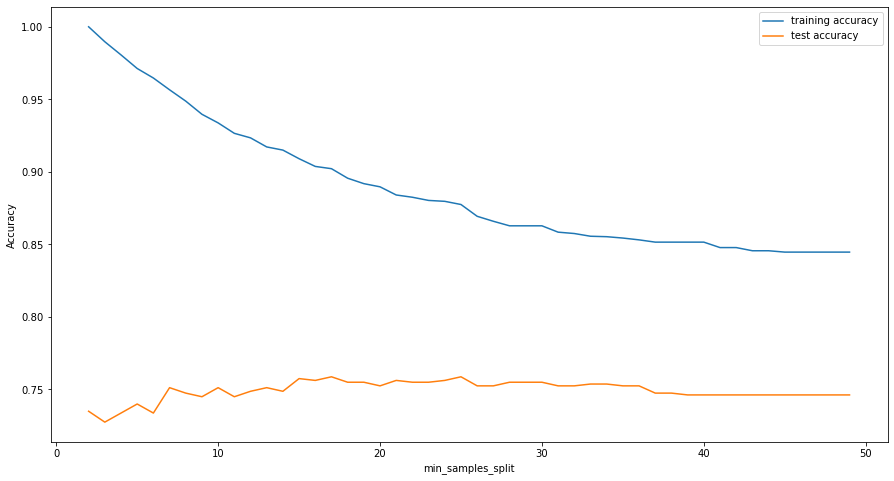

In [30]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.subplots(figsize=(15,8))
plt.plot(scores["param_min_samples_split"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_min_samples_split"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [31]:
# Grid Search to Find Optimal Hyperparameters
# Create the parameter grid 
param_grid = {

    'max_depth': range(5, 30, 5),
    'min_samples_leaf': range(0, 25, 5),
    'min_samples_split': range(1,50, 5),
    'criterion': ["entropy", "gini"]
    
}

n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2500 out of 2500 | elapsed:   13.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 30, 5),
                         'min_samples_leaf': range(0, 25, 5),
                         'min_samples_split': range(1, 50, 5)},
             return_train_score=True, verbose=1)

In [32]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000469,0.000200,0.000000,0.000000,entropy,5,0,1,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",NaN,...,NaN,NaN,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000391,0.000038,0.000000,0.000000,entropy,5,0,6,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",NaN,...,NaN,NaN,387,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000377,0.000011,0.000000,0.000000,entropy,5,0,11,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",NaN,...,NaN,NaN,386,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000367,0.000006,0.000000,0.000000,entropy,5,0,16,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",NaN,...,NaN,NaN,385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.000365,0.000001,0.000000,0.000000,entropy,5,0,21,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",NaN,...,NaN,NaN,384,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.004106,0.000242,0.000200,0.000008,gini,25,20,26,"{'criterion': 'gini', 'max_depth': 25, 'min_sa...",0.7625,...,0.76750,0.023519,166,0.828125,0.801562,0.815625,0.80625,0.81875,0.814063,0.009375
496,0.004117,0.000209,0.000215,0.000025,gini,25,20,31,"{'criterion': 'gini', 'max_depth': 25, 'min_sa...",0.7625,...,0.76750,0.023519,166,0.828125,0.801562,0.815625,0.80625,0.81875,0.814063,0.009375
497,0.004337,0.000118,0.000215,0.000010,gini,25,20,36,"{'criterion': 'gini', 'max_depth': 25, 'min_sa...",0.7625,...,0.76750,0.023519,166,0.828125,0.801562,0.815625,0.80625,0.81875,0.814063,0.009375
498,0.004245,0.000273,0.000207,0.000022,gini,25,20,41,"{'criterion': 'gini', 'max_depth': 25, 'min_sa...",0.7625,...,0.76875,0.022361,155,0.828125,0.801562,0.815625,0.80625,0.80625,0.811562,0.009458


In [33]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.7949999999999999
DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=6)


In [35]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=10,
                                  min_samples_split=6)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

0.875


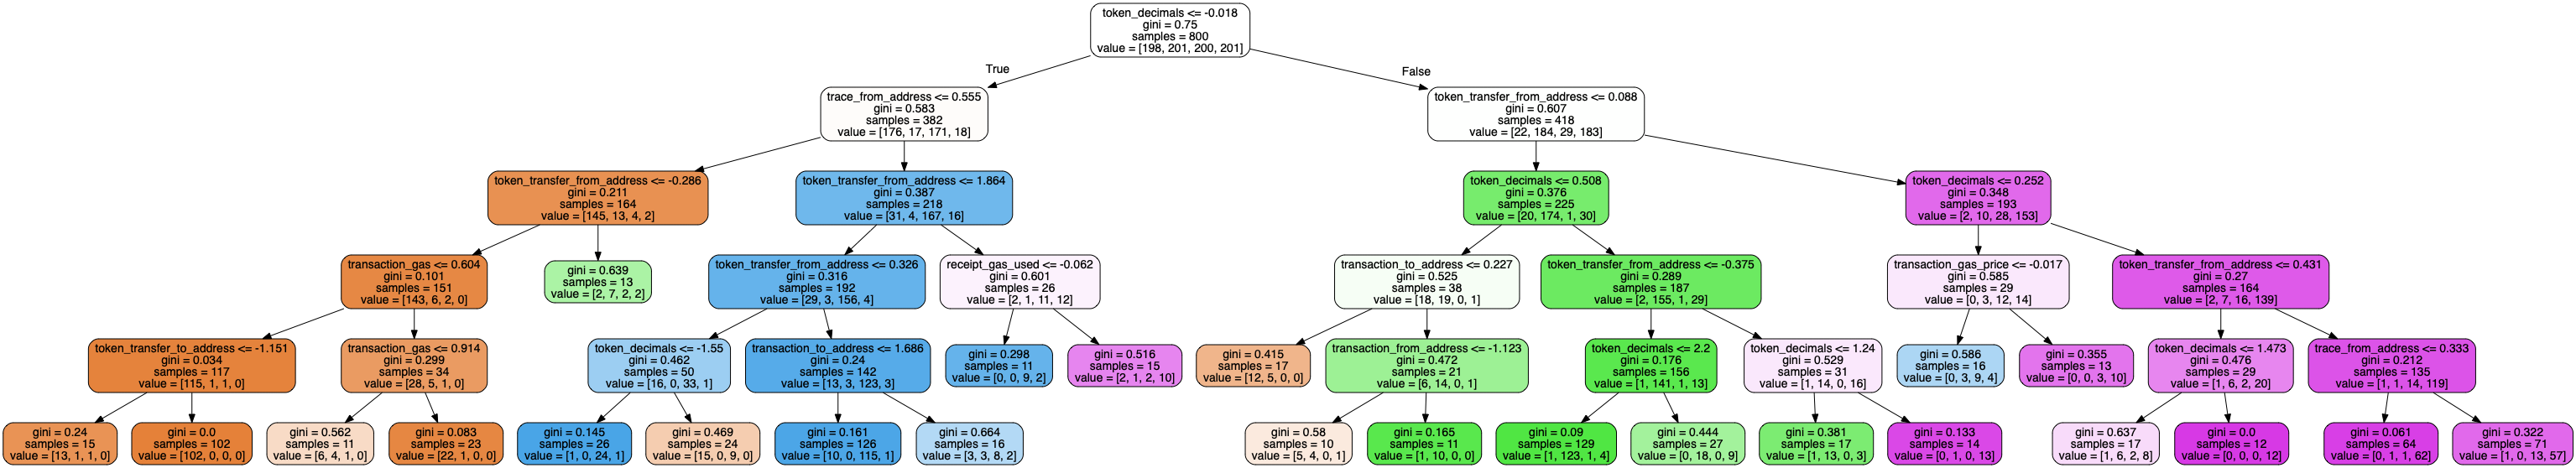

In [36]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [37]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics


# Making predictions
y_pred = clf_gini.predict(X_test)
y_pred_prob = clf_gini.predict_proba(X_test)

# Printing classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        49
           1       0.88      0.88      0.88        51
           2       0.93      0.82      0.87        50
           3       0.80      0.82      0.81        50

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.87       200
weighted avg       0.88      0.88      0.87       200



In [38]:
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
precision=sklearn.metrics.precision_score(y_test, y_pred,average='macro')
recall=sklearn.metrics.recall_score(y_test, y_pred,average='macro')

print("Accuracy: %.2f%% " % (accuracy * 100.0))
print("Precision: %.2f%% " % (precision *100))
print("Recall: %.2f%% " % (recall * 100))


Accuracy: 87.50% 
Precision: 87.67% 
Recall: 87.55% 


In [39]:
#### Print the FPR,TPR & select the best threshold from the roc curve

# # Let's take a look at the confusion matrix again 
print("confusion matrix:")
confusion = confusion_matrix(y_test,y_pred)
print(confusion)
print('\n')

# Let's check the overall accuracy.
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
print("Accuracy    : %.2f%% " % (accuracy * 100.0))


TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity 
sensitivity = TP / float(TP+FN)
print("Sensitivity : %.2f%% " % (sensitivity * 100.0))

# Let us calculate specificity
specificity = TN / float(TN+FP)
print("Specificity : %.2f%% " % (specificity * 100.0))
print('\n')

# Calculate True postive rate 
print("True Postive Rate : %.2f%% " % (sensitivity * 100.0))


# Calculate false postive rate - predicting Fraud when customer does not have non-Fraud
FPR = FP/ float(TN+FP)
print("False Postive Rate : %.2f%% " % (FPR * 100.0))

# positive predictive value 
PPV = TP / float(TP+FP)
print("Positive Predictive Value : %.2f%% " % (PPV * 100.0))

# Negative predictive value
NPV = TN / float(TN+ FN)
print("Negative Predictive Value : %.2f%% " % (NPV * 100.0))

confusion matrix:
[[48  0  1  0]
 [ 2 45  0  4]
 [ 2  1 41  6]
 [ 2  5  2 41]]


Accuracy    : 87.50% 
Sensitivity : 95.74% 
Specificity : 100.00% 


True Postive Rate : 95.74% 
False Postive Rate : 0.00% 
Positive Predictive Value : 100.00% 
Negative Predictive Value : 96.00% 


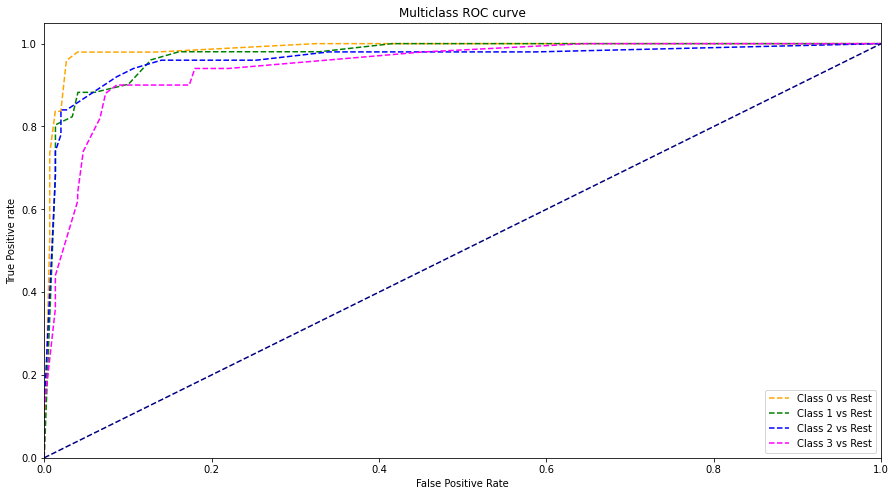

In [40]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_prob[:,i], pos_label=i)

# plotting   
plt.subplots(figsize=(15,8))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='magenta', label='Class 3 vs Rest')
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)

# Random Forest

In [41]:

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, 
                                                    random_state=101)

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

# fit
rfc.fit(X_train,y_train)


RandomForestClassifier()

In [42]:
# Making predictions
predictions = rfc.predict(X_test)
pred_prob = rfc.predict_proba(X_test)

In [43]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88        49
           1       0.86      0.86      0.86        51
           2       0.75      0.78      0.76        50
           3       0.81      0.86      0.83        50

    accuracy                           0.83       200
   macro avg       0.84      0.83      0.84       200
weighted avg       0.84      0.83      0.84       200



In [44]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[41  2  6  0]
 [ 0 44  5  2]
 [ 3  0 39  8]
 [ 0  5  2 43]]


In [45]:
accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
precision=sklearn.metrics.precision_score(y_test, predictions,average='macro')
recall=sklearn.metrics.recall_score(y_test, predictions,average='macro')

print("Accuracy: %.2f%% " % (accuracy * 100.0))
print("Precision: %.2f%% " % (precision *100))
print("Recall: %.2f%% " % (recall * 100))


Accuracy: 83.50% 
Precision: 83.90% 
Recall: 83.49% 


In [46]:
#### Print the FPR,TPR & select the best threshold from the roc curve

# # Let's take a look at the confusion matrix again 
print("confusion matrix:")
confusion = confusion_matrix(y_test,predictions)
print(confusion)
print('\n')

# Let's check the overall accuracy.
accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
print("Accuracy    : %.2f%% " % (accuracy * 100.0))


TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity 
sensitivity = TP / float(TP+FN)
print("Sensitivity : %.2f%% " % (sensitivity * 100.0))

# Let us calculate specificity
specificity = TN / float(TN+FP)
print("Specificity : %.2f%% " % (specificity * 100.0))
print('\n')

# Calculate True postive rate 
print("True Postive Rate : %.2f%% " % (sensitivity * 100.0))


# Calculate false postive rate - predicting Fraud when customer does not have non-Fraud
FPR = FP/ float(TN+FP)
print("False Postive Rate : %.2f%% " % (FPR * 100.0))

# positive predictive value 
PPV = TP / float(TP+FP)
print("Positive Predictive Value : %.2f%% " % (PPV * 100.0))

# Negative predictive value
NPV = TN / float(TN+ FN)
print("Negative Predictive Value : %.2f%% " % (NPV * 100.0))

confusion matrix:
[[41  2  6  0]
 [ 0 44  5  2]
 [ 3  0 39  8]
 [ 0  5  2 43]]


Accuracy    : 83.50% 
Sensitivity : 100.00% 
Specificity : 95.35% 


True Postive Rate : 100.00% 
False Postive Rate : 4.65% 
Positive Predictive Value : 95.65% 
Negative Predictive Value : 100.00% 


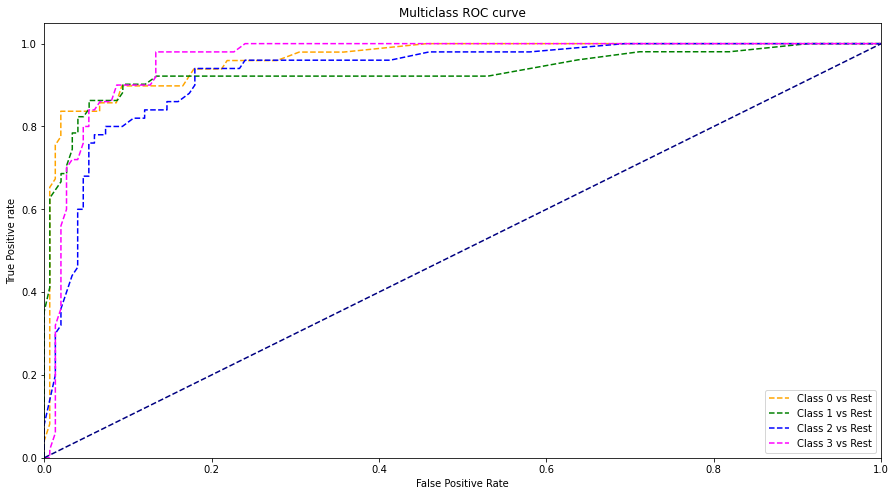

In [47]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

# plotting   
plt.subplots(figsize=(15,8))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='magenta', label='Class 3 vs Rest')
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)

In [48]:
# Tuning max_features

# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20]}

# instantiate the model
rf = RandomForestClassifier(max_depth=5)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", 
                  return_train_score=True)

rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(max_depth=5),
             param_grid={'max_features': [4, 8, 14, 20]},
             return_train_score=True, scoring='accuracy')

In [49]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.174140,0.022325,0.009687,0.002100,4,{'max_features': 4},0.80000,0.75625,0.81250,0.78125,...,0.78875,0.019121,4,0.868750,0.885938,0.870313,0.862500,0.865625,0.870625,0.008113
1,0.197729,0.003676,0.007630,0.000355,8,{'max_features': 8},0.80000,0.78750,0.82500,0.81875,...,0.81250,0.016298,1,0.885938,0.900000,0.878125,0.882812,0.876563,0.884688,0.008350
2,0.272461,0.001930,0.007247,0.000259,14,{'max_features': 14},0.80000,0.75625,0.83125,0.80625,...,0.80625,0.028777,3,0.904687,0.906250,0.901563,0.904687,0.887500,0.900938,0.006889
3,0.349554,0.007533,0.007890,0.001031,20,{'max_features': 20},0.79375,0.76875,0.83750,0.80625,...,0.80750,0.025125,2,0.910937,0.909375,0.909375,0.907813,0.896875,0.906875,0.005097


<Figure size 432x288 with 0 Axes>

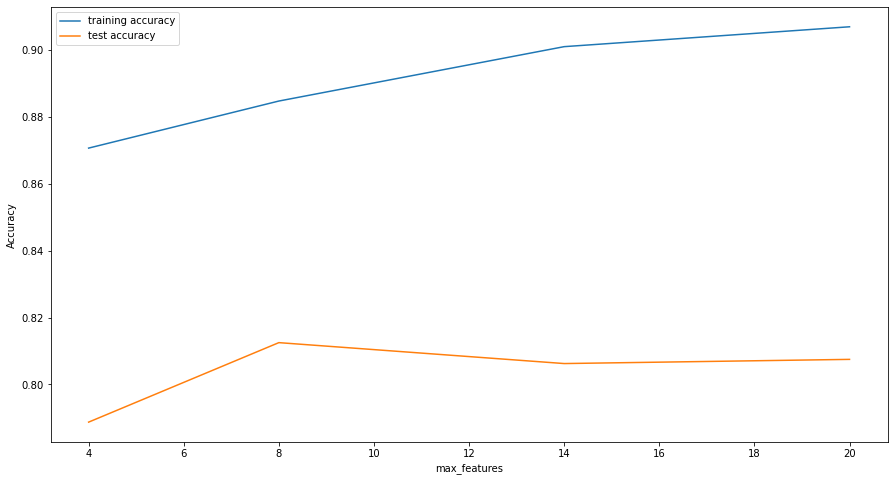

In [50]:
# plotting accuracies with max_features
plt.figure()
plt.subplots(figsize=(15,8))
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [51]:
# Tuning min_samples_leaf
# GridSearchCV to find optimal min_samples_leaf
# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# parameters to build the model on
parameters = {'min_samples_leaf': range(0,5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", 
                  return_train_score=True)

rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(0, 5)},
             return_train_score=True, scoring='accuracy')

In [52]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.039708,0.001065,0.000000,0.000000,0,{'min_samples_leaf': 0},NaN,NaN,NaN,NaN,...,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.196967,0.016762,0.008331,0.001444,1,{'min_samples_leaf': 1},0.81250,0.78125,0.81250,0.81875,...,0.81000,0.015104,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.197228,0.018009,0.009868,0.001985,2,{'min_samples_leaf': 2},0.81250,0.77500,0.81875,0.80625,...,0.80875,0.018792,2,0.984375,0.990625,0.987500,0.989062,0.984375,0.987188,0.002500
3,0.222875,0.016225,0.010176,0.001295,3,{'min_samples_leaf': 3},0.81875,0.79375,0.80000,0.80000,...,0.80625,0.010458,3,0.953125,0.950000,0.954688,0.957812,0.957812,0.954688,0.002965
4,0.188220,0.024503,0.008947,0.001428,4,{'min_samples_leaf': 4},0.79375,0.77500,0.79375,0.80000,...,0.79500,0.012119,4,0.923438,0.915625,0.926562,0.926562,0.925000,0.923438,0.004075


<Figure size 432x288 with 0 Axes>

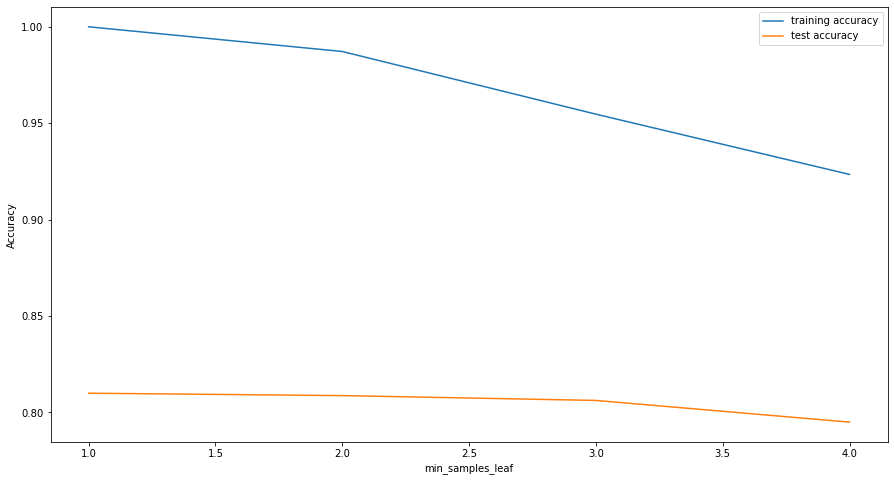

In [53]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.subplots(figsize=(15,8))
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [54]:
# Tuning min_samples_split
# GridSearchCV to find optimal min_samples_split
# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# parameters to build the model on
parameters = {'min_samples_split': range(0,6)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", 
                  return_train_score=True)

rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(0, 6)},
             return_train_score=True, scoring='accuracy')

In [55]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.039170,0.000338,0.000000,0.000000,0,{'min_samples_split': 0},NaN,NaN,NaN,NaN,...,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.035418,0.002975,0.000000,0.000000,1,{'min_samples_split': 1},NaN,NaN,NaN,NaN,...,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.198175,0.017360,0.008401,0.001021,2,{'min_samples_split': 2},0.81250,0.78125,0.81250,0.79375,...,0.80375,0.014031,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.195840,0.023705,0.008671,0.001894,3,{'min_samples_split': 3},0.81250,0.76250,0.82500,0.81875,...,0.80625,0.022361,1,1.000000,1.000000,1.000000,1.000000,0.998437,0.999687,0.000625
4,0.207785,0.016464,0.009167,0.000756,4,{'min_samples_split': 4},0.80625,0.76250,0.81875,0.81250,...,0.80500,0.022150,2,0.998437,0.998437,0.998437,0.996875,0.998437,0.998125,0.000625


<Figure size 432x288 with 0 Axes>

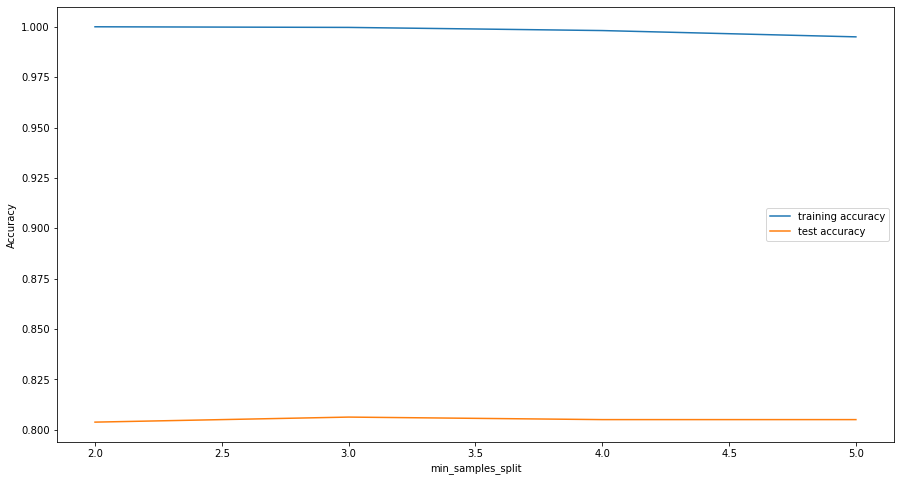

In [56]:
# plotting accuracies with min_samples_split
plt.figure()
plt.subplots(figsize=(15,8))
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [57]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [1,5,10],
    'min_samples_leaf': range(0,5),
    'min_samples_split': range(0,6),
    'n_estimators': [100,200, 300], 
    'max_features': [2,4,6,8,10,12,14,16,18,20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1, return_train_score=True)

In [58]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 2700 candidates, totalling 8100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 6026 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 8100 out of 8100 | elapsed: 10.0min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10],
                         'max_features': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                         'min_samples_leaf': range(0, 5),
                         'min_samples_split': range(0, 6),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [60]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.820018210319807 using {'max_depth': 5, 'max_features': 18, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}


In [61]:
# Fitting the final model with the best parameters obtained from grid search.
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=3, 
                             min_samples_split=2,
                             max_features=18,
                             n_estimators=100)

In [62]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_features=18, min_samples_leaf=3)

In [63]:
# Making predictions
predictions = rfc.predict(X_test)
pred_prob = rfc.predict_proba(X_test)

In [114]:
# evaluation metrics
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87        49
           1       0.86      0.86      0.86        51
           2       0.77      0.80      0.78        50
           3       0.83      0.86      0.84        50

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200

[[41  2  5  1]
 [ 1 44  5  1]
 [ 3  0 40  7]
 [ 0  5  2 43]]


In [64]:
accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
precision=sklearn.metrics.precision_score(y_test, predictions,average='macro')
recall=sklearn.metrics.recall_score(y_test, predictions,average='macro')

print("Accuracy: %.2f%% " % (accuracy * 100.0))
print("Precision: %.2f%% " % (precision *100))
print("Recall: %.2f%% " % (recall * 100))


Accuracy: 82.00% 
Precision: 82.33% 
Recall: 81.99% 


In [65]:
#### Print the FPR,TPR & select the best threshold from the roc curve

# # Let's take a look at the confusion matrix again 
print("confusion matrix:")
confusion = confusion_matrix(y_test,predictions)
print(confusion)
print('\n')

# Let's check the overall accuracy.
accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
print("Accuracy    : %.2f%% " % (accuracy * 100.0))


TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity 
sensitivity = TP / float(TP+FN)
print("Sensitivity : %.2f%% " % (sensitivity * 100.0))

# Let us calculate specificity
specificity = TN / float(TN+FP)
print("Specificity : %.2f%% " % (specificity * 100.0))
print('\n')

# Calculate True postive rate 
print("True Postive Rate : %.2f%% " % (sensitivity * 100.0))


# Calculate false postive rate - predicting Fraud when customer does not have non-Fraud
FPR = FP/ float(TN+FP)
print("False Postive Rate : %.2f%% " % (FPR * 100.0))

# positive predictive value 
PPV = TP / float(TP+FP)
print("Positive Predictive Value : %.2f%% " % (PPV * 100.0))

# Negative predictive value
NPV = TN / float(TN+ FN)
print("Negative Predictive Value : %.2f%% " % (NPV * 100.0))

confusion matrix:
[[41  2  5  1]
 [ 1 44  5  1]
 [ 3  0 39  8]
 [ 0  6  4 40]]


Accuracy    : 82.00% 
Sensitivity : 97.78% 
Specificity : 95.35% 


True Postive Rate : 97.78% 
False Postive Rate : 4.65% 
Positive Predictive Value : 95.65% 
Negative Predictive Value : 97.62% 


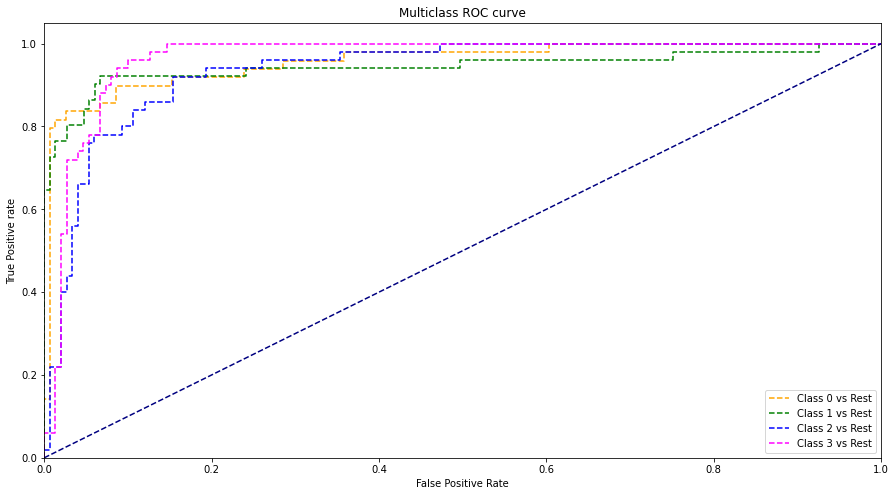

In [66]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

# plotting   
plt.subplots(figsize=(15,8))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='magenta', label='Class 3 vs Rest')
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)

# XGBoost

In [67]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    stratify=y, 
                                                    random_state = 99)

# Fitting the decision tree with default hyperparameters, apart from
model = XGBClassifier()
eval_set=[(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric="merror", eval_set=eval_set, verbose=True)

[0]	validation_0-merror:0.07125	validation_1-merror:0.15000
[1]	validation_0-merror:0.05750	validation_1-merror:0.13000
[2]	validation_0-merror:0.05375	validation_1-merror:0.13000
[3]	validation_0-merror:0.04625	validation_1-merror:0.13000
[4]	validation_0-merror:0.03750	validation_1-merror:0.12500
[5]	validation_0-merror:0.03125	validation_1-merror:0.12500
[6]	validation_0-merror:0.02750	validation_1-merror:0.12500
[7]	validation_0-merror:0.01750	validation_1-merror:0.13000
[8]	validation_0-merror:0.01375	validation_1-merror:0.12500
[9]	validation_0-merror:0.00500	validation_1-merror:0.12500
[10]	validation_0-merror:0.00500	validation_1-merror:0.11500
[11]	validation_0-merror:0.00375	validation_1-merror:0.12000
[12]	validation_0-merror:0.00125	validation_1-merror:0.12000
[13]	validation_0-merror:0.00125	validation_1-merror:0.12500
[14]	validation_0-merror:0.00000	validation_1-merror:0.12500
[15]	validation_0-merror:0.00000	validation_1-merror:0.11500
[16]	validation_0-merror:0.00000	v

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

[15:51:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:51:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:51:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:51:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1

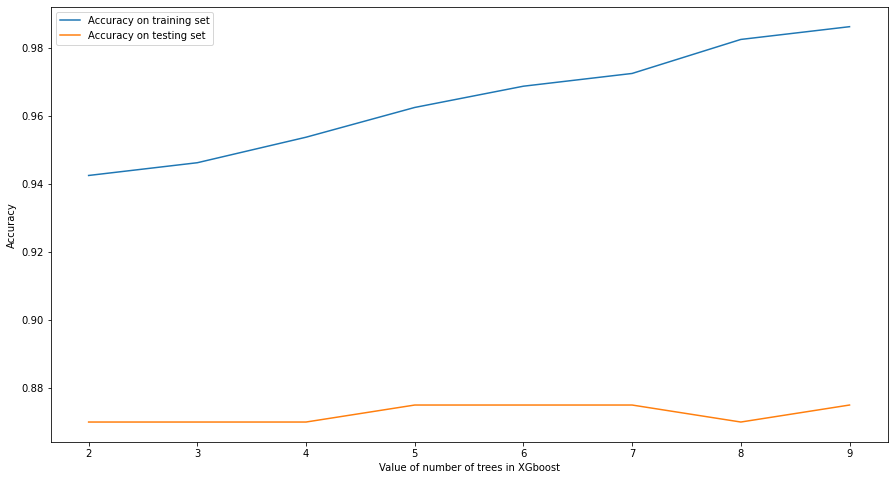

In [68]:
tree_range = range(2, 10)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree)
    xgb.fit(X_train,y_train)
    score1.append(xgb.score(X_train,y_train))
    score2.append(xgb.score(X_test,y_test))
    
%matplotlib inline
plt.subplots(figsize=(15,8))
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

In [69]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_prediction = model.predict(X_test)
y_pred = model.predict_proba(X_test)
y_pred[:10]

array([[1.5214864e-04, 9.9969649e-01, 8.7699103e-05, 6.3661268e-05],
       [2.6094430e-04, 6.0225860e-04, 3.9939564e-02, 9.5919728e-01],
       [1.4687162e-03, 5.4920296e-04, 9.9759907e-01, 3.8305970e-04],
       [2.9976577e-03, 9.9558675e-01, 1.8441291e-04, 1.2311459e-03],
       [1.0042265e-03, 9.9816018e-01, 1.5840195e-04, 6.7722419e-04],
       [1.2459780e-02, 6.8341347e-04, 9.8666316e-01, 1.9362300e-04],
       [1.4126305e-04, 7.9142301e-05, 1.8426250e-03, 9.9793696e-01],
       [1.8849486e-03, 9.5396867e-04, 1.1565710e-03, 9.9600452e-01],
       [5.2399110e-02, 6.9859248e-01, 1.7319813e-03, 2.4727637e-01],
       [3.1955343e-02, 9.6727216e-01, 3.5420217e-04, 4.1827618e-04]],
      dtype=float32)

In [71]:
accuracy = sklearn.metrics.accuracy_score(y_test, y_prediction)
precision=sklearn.metrics.precision_score(y_test, y_prediction,average='macro')
recall=sklearn.metrics.recall_score(y_test, y_prediction,average='macro')

print("Accuracy: %.2f%% " % (accuracy * 100.0))
print("Precision: %.2f%% " % (precision *100))
print("Recall: %.2f%% " % (recall * 100))


Accuracy: 88.00% 
Precision: 88.30% 
Recall: 88.02% 


In [72]:
#### Print the FPR,TPR & select the best threshold from the roc curve

# # Let's take a look at the confusion matrix again 
print("confusion matrix:")
confusion = confusion_matrix(y_test,y_prediction)
print(confusion)
print('\n')

# Let's check the overall accuracy.
accuracy = sklearn.metrics.accuracy_score(y_test, y_prediction)
print("Accuracy    : %.2f%% " % (accuracy * 100.0))


TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity 
sensitivity = TP / float(TP+FN)
print("Sensitivity : %.2f%% " % (sensitivity * 100.0))

# Let us calculate specificity
specificity = TN / float(TN+FP)
print("Specificity : %.2f%% " % (specificity * 100.0))
print('\n')

# Calculate True postive rate 
print("True Postive Rate : %.2f%% " % (sensitivity * 100.0))


# Calculate false postive rate - predicting Fraud when customer does not have non-Fraud
FPR = FP/ float(TN+FP)
print("False Postive Rate : %.2f%% " % (FPR * 100.0))

# positive predictive value 
PPV = TP / float(TP+FP)
print("Positive Predictive Value : %.2f%% " % (PPV * 100.0))

# Negative predictive value
NPV = TN / float(TN+ FN)
print("Negative Predictive Value : %.2f%% " % (NPV * 100.0))

confusion matrix:
[[46  2  1  0]
 [ 1 46  0  4]
 [ 3  0 42  5]
 [ 1  6  1 42]]


Accuracy    : 88.00% 
Sensitivity : 97.87% 
Specificity : 95.83% 


True Postive Rate : 97.87% 
False Postive Rate : 4.17% 
Positive Predictive Value : 95.83% 
Negative Predictive Value : 97.87% 


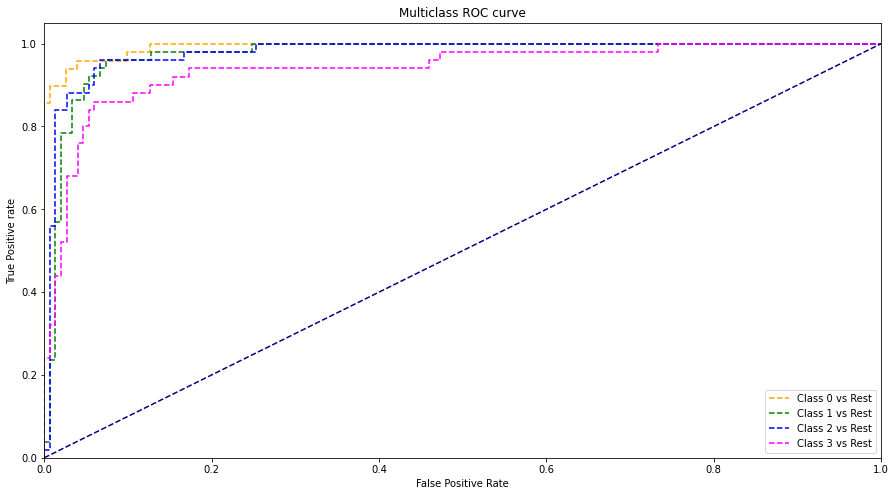

In [73]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred[:,i], pos_label=i)

# plotting   
plt.subplots(figsize=(15,8))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='magenta', label='Class 3 vs Rest')
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)

In [74]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          

# specify model
xgb_model = XGBClassifier(max_depth=10, objective='multi:softprob',n_estimators=100, num_class=4)


# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid,
                        scoring= 'roc_auc_ovr', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)  



In [75]:
# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[15:52:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[15:52:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:52:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:52:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:52:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1

[15:52:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:52:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    8.2s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=10, min_child_weight=None,
                                     missi...
                                     n_estimators=100, n_jobs=None, num_class=4,
                                     num_parallel_tree=None,
                                     objective='multi:softprob',
                                     random_state=None, reg_alpha=None,
                                     reg_l

In [76]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.234780,0.089157,0.003925,0.000629,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.937040,0.938646,0.956146,...,0.944527,0.009856,5,0.999968,0.999997,0.999997,0.999971,0.999993,0.999985,0.000013
1,0.445204,0.201123,0.004359,0.000531,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.950493,0.942240,0.957760,...,0.949750,0.008147,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.285795,0.045092,0.004050,0.000114,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.953242,0.946198,0.959531,...,0.952928,0.008489,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.159742,0.019711,0.003804,0.000252,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.919832,0.925104,0.954635,...,0.931675,0.012334,6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.276469,0.101239,0.003898,0.000328,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.948517,0.930833,0.949427,...,0.945537,0.011106,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
5,0.182859,0.016837,0.003686,0.000139,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.943106,0.939844,0.961875,...,0.948252,0.011403,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [77]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
#cv_results['param_max_depth'] = cv_results['param_max_depth'].astype('float')
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.234780,0.089157,0.003925,0.000629,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.937040,0.938646,0.956146,...,0.944527,0.009856,5,0.999968,0.999997,0.999997,0.999971,0.999993,0.999985,0.000013
1,0.445204,0.201123,0.004359,0.000531,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.950493,0.942240,0.957760,...,0.949750,0.008147,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.285795,0.045092,0.004050,0.000114,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.953242,0.946198,0.959531,...,0.952928,0.008489,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.159742,0.019711,0.003804,0.000252,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.919832,0.925104,0.954635,...,0.931675,0.012334,6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.276469,0.101239,0.003898,0.000328,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.948517,0.930833,0.949427,...,0.945537,0.011106,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


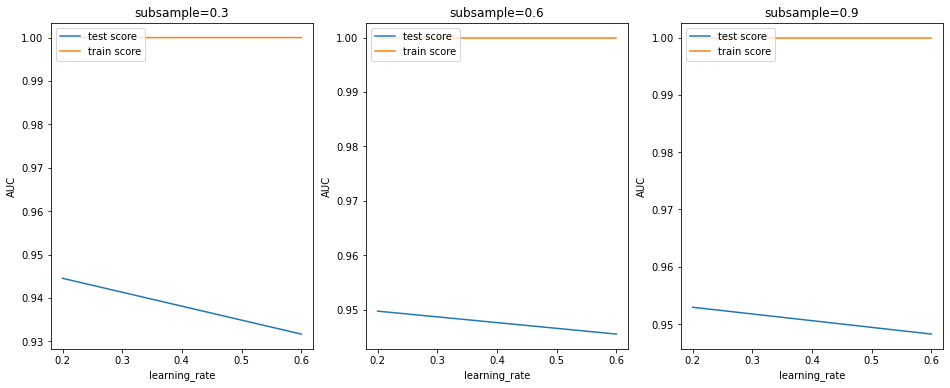

In [78]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    #plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    #plt.xscale('log')

In [79]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc

#The results show that a subsample size of 0.6 and learning_rate of about 0.2 seems optimal.
#Also, XGBoost has resulted in the highest ROC AUC obtained (across various hyperparameters).

params = {'learning_rate': 0.2,
          'max_depth': 10, 
          'n_estimators':100,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train, y_train)

[15:53:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:541: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:53:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob',
              params={'learning_rate': 0.2, 'max_depth': 10,
                      'n_estimators': 100, 'objective': 'binary:logistic',
                      'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [80]:
y_prediction = model.predict(X_test)
y_pred = model.predict_proba(X_test)
y_pred[:10]

array([[1.5214864e-04, 9.9969649e-01, 8.7699103e-05, 6.3661268e-05],
       [2.6094430e-04, 6.0225860e-04, 3.9939564e-02, 9.5919728e-01],
       [1.4687162e-03, 5.4920296e-04, 9.9759907e-01, 3.8305970e-04],
       [2.9976577e-03, 9.9558675e-01, 1.8441291e-04, 1.2311459e-03],
       [1.0042265e-03, 9.9816018e-01, 1.5840195e-04, 6.7722419e-04],
       [1.2459780e-02, 6.8341347e-04, 9.8666316e-01, 1.9362300e-04],
       [1.4126305e-04, 7.9142301e-05, 1.8426250e-03, 9.9793696e-01],
       [1.8849486e-03, 9.5396867e-04, 1.1565710e-03, 9.9600452e-01],
       [5.2399110e-02, 6.9859248e-01, 1.7319813e-03, 2.4727637e-01],
       [3.1955343e-02, 9.6727216e-01, 3.5420217e-04, 4.1827618e-04]],
      dtype=float32)

In [81]:
accuracy = sklearn.metrics.accuracy_score(y_test, y_prediction)
precision=sklearn.metrics.precision_score(y_test, y_prediction,average='macro')
recall=sklearn.metrics.recall_score(y_test, y_prediction,average='macro')

print("Accuracy: %.2f%% " % (accuracy * 100.0))
print("Precision: %.2f%% " % (precision *100))
print("Recall: %.2f%% " % (recall * 100))


Accuracy: 88.00% 
Precision: 88.30% 
Recall: 88.02% 


In [82]:
#### Print the FPR,TPR & select the best threshold from the roc curve

# # Let's take a look at the confusion matrix again 
print("confusion matrix:")
confusion = confusion_matrix(y_test,y_prediction)
print(confusion)
print('\n')

# Let's check the overall accuracy.
accuracy = sklearn.metrics.accuracy_score(y_test, y_prediction)
print("Accuracy    : %.2f%% " % (accuracy * 100.0))


TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity 
sensitivity = TP / float(TP+FN)
print("Sensitivity : %.2f%% " % (sensitivity * 100.0))

# Let us calculate specificity
specificity = TN / float(TN+FP)
print("Specificity : %.2f%% " % (specificity * 100.0))
print('\n')

# Calculate True postive rate 
print("True Postive Rate : %.2f%% " % (sensitivity * 100.0))


# Calculate false postive rate - predicting Fraud when customer does not have non-Fraud
FPR = FP/ float(TN+FP)
print("False Postive Rate : %.2f%% " % (FPR * 100.0))

# positive predictive value 
PPV = TP / float(TP+FP)
print("Positive Predictive Value : %.2f%% " % (PPV * 100.0))

# Negative predictive value
NPV = TN / float(TN+ FN)
print("Negative Predictive Value : %.2f%% " % (NPV * 100.0))

confusion matrix:
[[46  2  1  0]
 [ 1 46  0  4]
 [ 3  0 42  5]
 [ 1  6  1 42]]


Accuracy    : 88.00% 
Sensitivity : 97.87% 
Specificity : 95.83% 


True Postive Rate : 97.87% 
False Postive Rate : 4.17% 
Positive Predictive Value : 95.83% 
Negative Predictive Value : 97.87% 


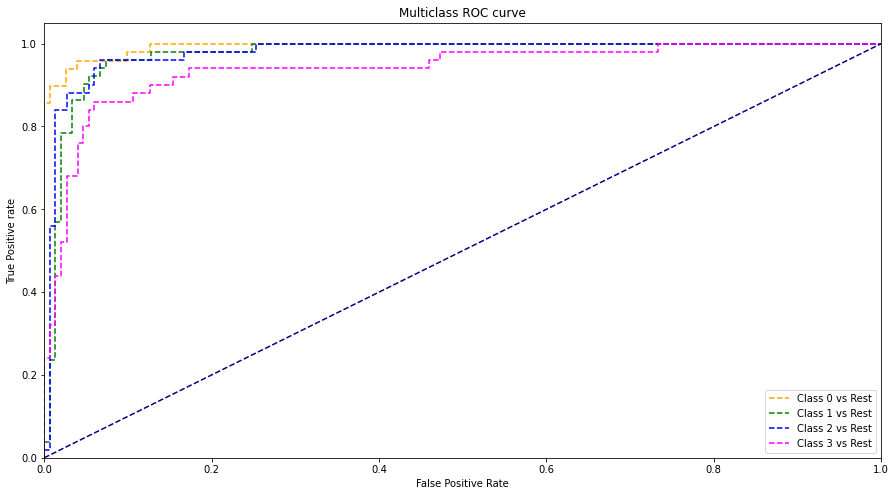

In [84]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred[:,i], pos_label=i)

# plotting   
plt.subplots(figsize=(15,8))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='magenta', label='Class 3 vs Rest')
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)

In [85]:
# feature importance
importance = dict(zip(feature_cols.columns, model.feature_importances_))
importance = sorted(importance.items(), key=lambda x:x[1],reverse=True)
importance

[('trace_from_address', 0.3086279),
 ('token_transfer_from_address', 0.1541869),
 ('token_decimals', 0.13520354),
 ('transaction_from_address', 0.041813623),
 ('transaction_to_address', 0.036888547),
 ('token_transfer_to_address', 0.028747967),
 ('receipt_gas_used', 0.027688103),
 ('trace_value', 0.024868554),
 ('trace_gas', 0.024106627),
 ('receipt_status', 0.02320103),
 ('trace_gas_used', 0.02232336),
 ('token_transfer_value', 0.021825304),
 ('transaction_value', 0.021476977),
 ('trace_to_address', 0.0208992),
 ('Contract_address', 0.019929413),
 ('transaction_gas', 0.019385168),
 ('token_total_supply', 0.01872537),
 ('Contract_is_erc20', 0.01823772),
 ('transaction_gas_price', 0.01679462),
 ('receipt_cumulative_gas_used', 0.015070091)]

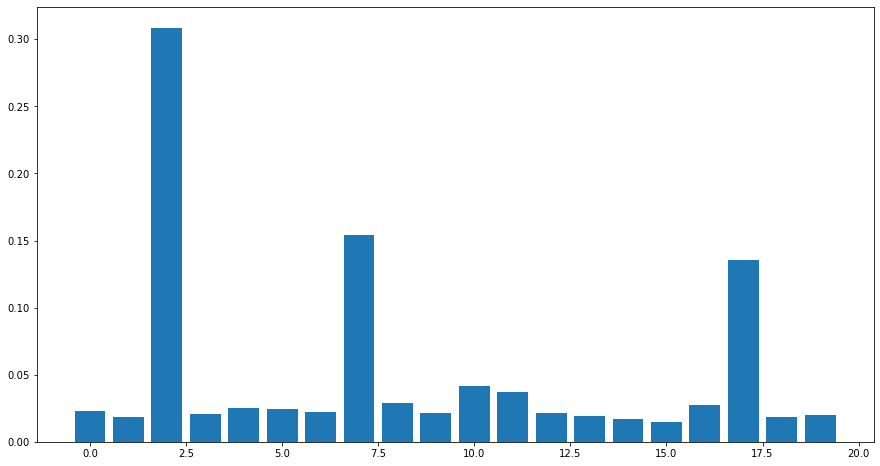

In [86]:
# plot
plt.subplots(figsize=(15,8))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed